### This is the visual EDA of the data set provided The Lending Club for all the loans listed as accepted from year 2007 to year 2018 Q2. The Data has been cleaned already and cleaned data set is loaded from clean_loan.csv. 

In [1]:
%matplotlib inline

# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set()

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
# read 'clean_loan.csv'  dataset as a dataframe
clean_loan = pd.read_csv('clean_loan.csv', low_memory =  False, index_col = 0)

clean_loan = clean_loan.fillna(0)
clean_loan.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890721 entries, 0 to 1939178
Data columns (total 23 columns):
id                      1890721 non-null float64
loan_amnt               1890721 non-null float64
term                    1890721 non-null int64
int_rate                1890721 non-null float64
installment             1890721 non-null float64
grade                   1890721 non-null object
home_ownership          1890721 non-null object
annual_inc              1890721 non-null float64
verification_status     1890721 non-null object
issue_d                 1890721 non-null object
purpose                 1890721 non-null object
dti                     1890721 non-null float64
inq_last_6mths          1890721 non-null float64
open_acc                1890721 non-null float64
pub_rec                 1890721 non-null float64
revol_bal               1890721 non-null float64
revol_util              1890721 non-null float64
total_acc               1890721 non-null float64
application_

In [4]:
# Create a copy of training set for EDA
loan = clean_loan.copy()
loan['Loan default'] = loan['default']
loan['Loan default'] = loan['Loan default'].replace({0:'No Default', 1:'Default'})

## Lets analyze different parameters
######    1. Loan Grades counts for no default and default loans

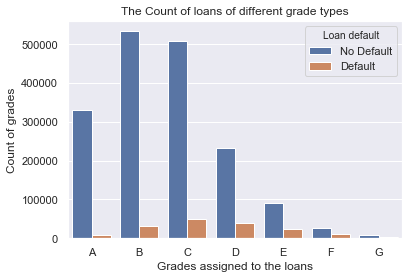

In [5]:
sns.countplot(data = loan, x='grade', hue = 'Loan default', order = ['A', 'B','C','D','E','F','G'])
plt.xlabel('Grades assigned to the loans')
plt.ylabel('Count of grades')
plt.title('The Count of loans of different grade types')
plt.show()

###### Above plot shows that Grade A type loans have lower default count. Loans with Grades B, C, D have higher default count but that could be because there are high number of loans graded as B, C, and D.

##### 2. Distribution plot of Interest Rate vs FICO Score

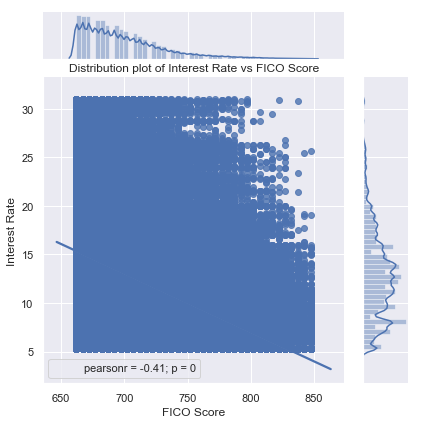

In [6]:
sns.jointplot(data = loan, x = 'fico_score', y = 'int_rate', kind = 'reg', space = 0.4).annotate(stats.pearsonr).set_axis_labels('FICO Score', 'Interest Rate')
plt.title('Distribution plot of Interest Rate vs FICO Score')
plt.show()

###### Above plot shows that for borrowers with lower FICO Score got high interest rate. The plot shows the distribution of FICO score on marginal x axis and distribution of Interest rate on marginal y axis. Pearson coefficient is -ve which means increasing FICO score corresponds to lower interest rate.

##### 3. Distribution of Loan amount vs Interest rate for default and no default loans. To reduce the number of points, x_estimator is used which plots the average y value of all the points with same x value and draws a line to indicate the range of values.

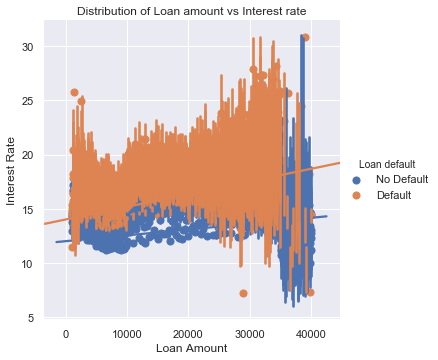

In [7]:
sns.lmplot(data = loan, x = 'loan_amnt', y = 'int_rate', hue = 'Loan default', x_estimator = np.mean)
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.title('Distribution of Loan amount vs Interest rate')
plt.show()

##### Above plot shows that the same range of loan amounts have higher interest rate for loans which are defaulted.

##### 4. FICO Score Statistics for default and No Default loans. The whisker (box) plot of FICO Score displays, minimum, maximum,  median, 1st quantile, 3rd quantile values.

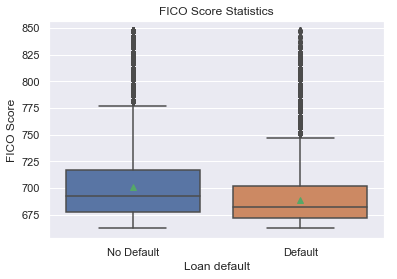

In [8]:
sns.boxplot(data = loan, x= 'Loan default', y = 'fico_score', showmeans = True)
plt.ylabel('FICO Score')
plt.title('FICO Score Statistics')
plt.show()

###### Since mean and median value of loans is less for loans which are defaulted, the  plots show that borrowers with less FICO score have higher chances defaulting the loan. 
##### 5. Lets draw the regplot for this data. This regression line is linear which means the FICO Score and default rate inversely proportional to each other.

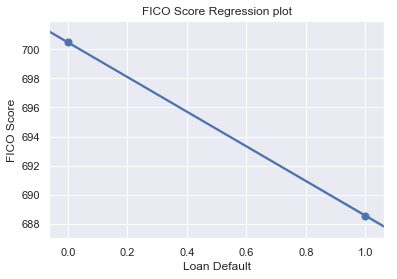

In [9]:
sns.regplot(data=loan, x= 'default', y = 'fico_score', x_estimator=np.mean)
plt.ylabel('FICO Score')
plt.xlabel('Loan Default')
plt.title('FICO Score Regression plot')
plt.show()

##### 6. Draw the whisker plot for Annual Income Statistics. to draw the plot, removed the ouliers which are above the 95 quantiles and below 2 quantiles.
##### The plot shows that the mean and median of annual income of  borrowers with defaulted loan are lower than the mean and median of the annual income of borrowers with no default. But this difference is not significantly big that we can draw a clean conclusion based on it.

In [10]:
quant = np.quantile(loan.annual_inc, 0.95)
quant1 = np.quantile(loan.annual_inc, 0.02)
print(loan.annual_inc[(loan.default == 0) & (loan.annual_inc < quant) & (loan.annual_inc > quant1)].describe())
print(loan.annual_inc[(loan.default == 1) & (loan.annual_inc < quant) & (loan.annual_inc > quant1)].describe())

count    1.603275e+06
mean     6.995731e+04
std      2.982658e+04
min      2.160200e+04
25%      4.700000e+04
50%      6.500000e+04
75%      8.900000e+04
max      1.549920e+05
Name: annual_inc, dtype: float64
count    154424.000000
mean      64813.916749
std       27931.343202
min       21609.550000
25%       44000.000000
50%       60000.000000
75%       80000.000000
max      154992.000000
Name: annual_inc, dtype: float64


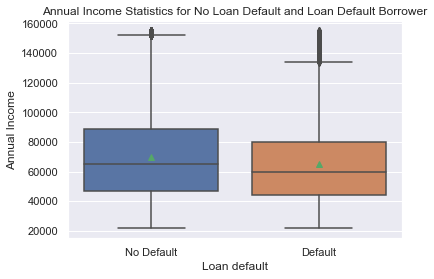

In [11]:
annual_inc = loan.annual_inc[loan.annual_inc.apply(lambda x: ((x < quant) & (x > quant1)))]
sns.boxplot(y = annual_inc, x = loan['Loan default'], showmeans = True)
plt.ylabel('Annual Income')
plt.title('Annual Income Statistics for No Loan Default and Loan Default Borrower')
plt.show()

##### 7. Draw the whisker plot for Interest Rate Statistics. to draw the plot, removed the ouliers which are above the 90 quantiles.
##### The plot shows that minimum and maximum values of interest rates  are similar but the mean and median of interest rates of  loans with default are significantly higher than the mean and median of the interest rates of loans with no default.

             count       mean       std   min    25%    50%    75%    max
default                                                                  
0        1727370.0  12.821404  4.694383  5.31   9.44  12.35  15.49  30.99
1         163351.0  15.827690  4.669609  5.31  12.69  15.59  18.75  30.99


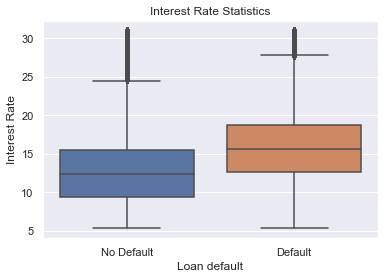

In [12]:
print(loan.groupby(loan.default)['int_rate'].describe())
sns.boxplot(data = loan, x= loan['Loan default'], y = 'int_rate')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Statistics')
plt.show()

##### 8. Plot the distribution graph for debt to interest ratio for default and not default borrowers.
###### Th plot below shows the distribution graph is normal for both default and no default borrowers. The default borrowers tend to have higher dti ratio than the no default borrowers.

             count       mean        std  min    25%    50%    75%    max
default                                                                  
0        1727370.0  18.710954  13.533258 -1.0  11.93  17.79  24.37  999.0
1         163351.0  20.289228   9.255912  0.0  13.89  20.07  26.52  999.0


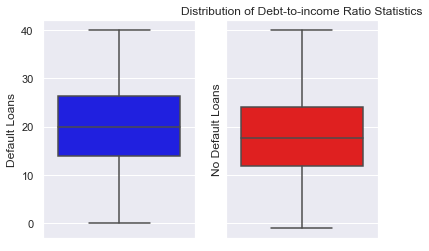

In [13]:
# removed the outliers
loan.dti = loan.dti
quant = np.quantile(loan.dti, 0.99)
dti_default = loan.dti[loan.default == 1]
dti_default = dti_default[dti_default.apply(lambda x: (x < quant))]
dti_nodefault = loan.dti[loan.default == 0]
dti_nodefault = dti_nodefault[dti_nodefault.apply(lambda x: (x < quant))]


print(loan.groupby(loan.default)['dti'].describe())

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(data = loan, y = dti_default, color = 'blue', ax = ax1)
ax1.set_ylabel('Default Loans')
sns.boxplot(data = loan, y = dti_nodefault, color = 'red', ax = ax2)
plt.title('Distribution of Debt-to-income Ratio Statistics')
ax2.set_ylabel('No Default Loans')
plt.show()

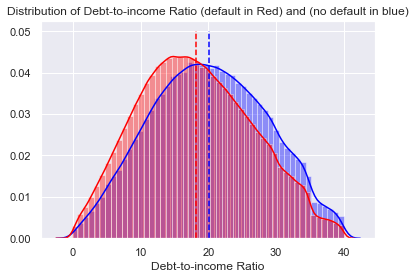

In [14]:
sns.distplot(dti_default, color = 'blue')
sns.distplot(dti_nodefault, color = 'red')
plt.title('Distribution of Debt-to-income Ratio (default in Red) and (no default in blue)')
plt.xlabel('Debt-to-income Ratio')
plt.vlines(x= dti_default.mean(), ymin = 0, ymax=0.05, color = 'blue', linestyles = 'dashed')
plt.vlines(x= dti_nodefault.mean(), ymin = 0, ymax=0.05, color = 'red', linestyles = 'dashed')
plt.show()

##### 9. Count plot of verification status for  default loans and all the loans respectively
###### verification status indicates if income was verified by [Lending Club], not verified, or if the income source was verified.
######  There are more chances of loans default when borrowers' income is not verified.

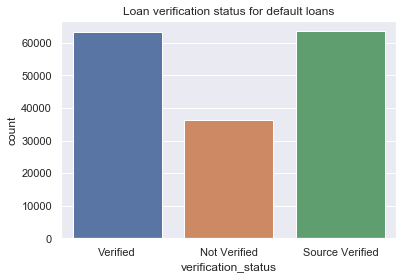

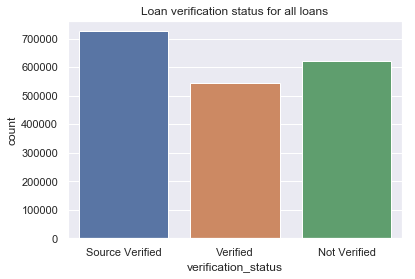

In [15]:
#sns.countplot(data = loan, x = 'Loan default', hue='verification_status')
v_status = loan.verification_status[loan.default == 1]
sns.countplot(data = loan, x = v_status)
plt.title('Loan verification status for default loans')
plt.show()
plt.clf()
sns.countplot(data = loan, x = 'verification_status')
plt.title('Loan verification status for all loans')
plt.show()

##### 10. Count plot of loan terms for all loans and  defaulted loans
######  The comparison shows that the loans with 60 months term defaulted more than 36 months loans

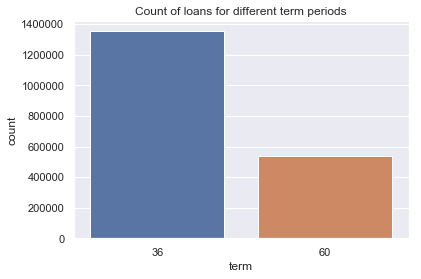

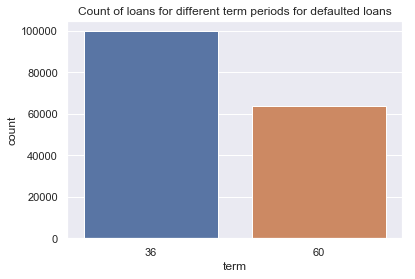

In [16]:
sns.countplot(data = loan, x = 'term')
plt.title('Count of loans for different term periods')
plt.show()
term_default = loan.term[loan.default == 1]
sns.countplot(x = term_default)
plt.title('Count of loans for different term periods for defaulted loans')
plt.show()

##### 11. The count plot of home ownership 
###### The plots show that borrowers with default loans tend to  RENT the house.

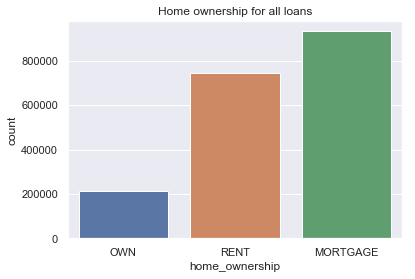

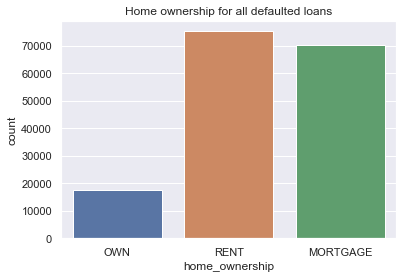

In [17]:
sns.countplot(data = loan, x = 'home_ownership', order = ['OWN', 'RENT', 'MORTGAGE'])
plt.title('Home ownership for all loans')
plt.show()
owner_default = loan.home_ownership[loan.default == 1]
sns.countplot(data = loan, x = owner_default, order = ['OWN', 'RENT', 'MORTGAGE'])
plt.title('Home ownership for all defaulted loans')
plt.show()

##### 12. The distribution plot   and Boxplot for loan amount 

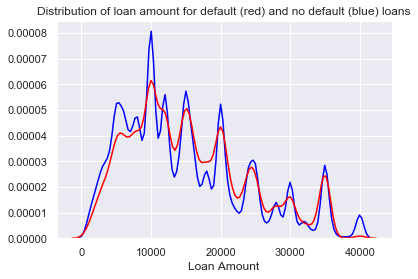

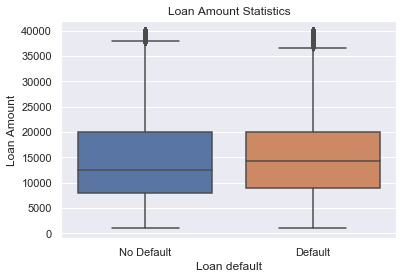

In [18]:
sns.distplot(loan.loan_amnt[loan.default == 0], hist = False, color = 'blue')
sns.distplot(loan.loan_amnt[loan.default == 1], hist = False, color = 'red')
plt.title('Distribution of loan amount for default (red) and no default (blue) loans')
plt.xlabel('Loan Amount')
plt.show()

sns.boxplot(data = loan, x= loan['Loan default'], y = 'loan_amnt')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Statistics')
plt.show()

###### default loans tend to have higher loan amounts. Let's compare the summary statistics by loan status:

In [19]:
loan.groupby('Loan default')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan default,,,,,,,,
Default,163351.0,15486.757657,8610.660476,1000.0,9000.0,14300.0,20050.0,40000.0
No Default,1727370.0,14841.485973,9038.656893,1000.0,8000.0,12500.0,20000.0,40000.0


###### Lets calculate pearson's coefficient for each predictor to find the dependency on response (default) 

In [20]:
loan1 = clean_loan.copy()
y = loan1.loc[:,'default']
# drop default, grade and id columns
loan1 = loan1.drop(['default', 'id', 'grade'], axis = 1)
cols = ['home_ownership', 'verification_status', 'purpose','application_type','int_rate', 'term', 'issue_d', 'inq_last_6mths', 'revol_bal', 'revol_util']
loan1 = loan1.drop(cols, axis = 1)
loan1.columns

Index(['loan_amnt', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score'],
      dtype='object')

In [21]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890721 entries, 0 to 1939178
Data columns (total 10 columns):
loan_amnt               float64
installment             float64
annual_inc              float64
dti                     float64
open_acc                float64
pub_rec                 float64
total_acc               float64
mort_acc                float64
pub_rec_bankruptcies    float64
fico_score              float64
dtypes: float64(10)
memory usage: 158.7 MB


In [22]:
pearsoncorr = pd.DataFrame()
for col in loan1.columns:
    pearsoncorr.loc[col,'pearsoncorr'] = abs(loan1[col].corr(y))
    
pearsoncorr.sort_values('pearsoncorr', ascending = False, inplace = True)
pearsoncorr

,pearsoncorr
fico_score,0.102912
annual_inc,0.051180
dti,0.033526
installment,0.025416
mort_acc,0.022863
total_acc,0.022219
loan_amnt,0.020133
open_acc,0.017151
pub_rec,0.014439
pub_rec_bankruptcies,0.014403


## Conclusion

###### Above analysis shows that FICO score, interest rate, loan amount, annual income, debt to income ratio have high impact on the loan defaults. The Pearson Correlation Coefficient also shows that FICO score, annual income and debt to income ratio are 3 bigger impact on loan defaults.